##### 버스 상관관계 분석

In [1]:
import pandas as pd
import numpy as np

- 폭염: 일 최고기온이 33°C 이상인 날
- 한파: 아침 최저기온(03:01~09:00)이 영하 12도 이하인 날

In [2]:
bus = pd.read_csv("./bus_pre_tem_merge.csv")
bus.head()

,날짜,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구,-5.0,-8.2,-0.6,NaN
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구,-5.0,-8.2,-0.6,NaN
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구,-5.0,-8.2,-0.6,NaN
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구,-5.0,-8.2,-0.6,NaN
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구,-5.0,-8.2,-0.6,NaN


In [3]:
bus['총승객수'] = bus['승차총승객수'] + bus['하차총승객수']
bus.head()

,날짜,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),총승객수
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구,-5.0,-8.2,-0.6,NaN,10
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구,-5.0,-8.2,-0.6,NaN,5
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구,-5.0,-8.2,-0.6,NaN,28
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구,-5.0,-8.2,-0.6,NaN,122
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구,-5.0,-8.2,-0.6,NaN,163


In [4]:
# 평균기온이 33.0 이상인 경우 '폭염', -12.0 이하인 경우 '한파' 컬럼 생성
bus['폭염'] = np.where(bus['최고기온(℃)'] >= 33.0, 1, 0)
bus['한파'] = np.where(bus['최저기온(℃)'] <= -12.0, 1, 0)

bus.head()

,날짜,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),총승객수,폭염,한파
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구,-5.0,-8.2,-0.6,NaN,10,0,0
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구,-5.0,-8.2,-0.6,NaN,5,0,0
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구,-5.0,-8.2,-0.6,NaN,28,0,0
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구,-5.0,-8.2,-0.6,NaN,122,0,0
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구,-5.0,-8.2,-0.6,NaN,163,0,0


In [5]:
# '강수량(mm)' 컬럼의 NaN 값을 0으로 변경
bus['강수량(mm)'] = bus['강수량(mm)'].fillna(0).astype(int)

bus.head()

,날짜,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),총승객수,폭염,한파
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구,-5.0,-8.2,-0.6,0,10,0,0
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구,-5.0,-8.2,-0.6,0,5,0,0
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구,-5.0,-8.2,-0.6,0,28,0,0
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구,-5.0,-8.2,-0.6,0,122,0,0
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구,-5.0,-8.2,-0.6,0,163,0,0


In [6]:
# '폭염' 컬럼의 고유한 값 확인
unique_values = bus['폭염'].unique()
print(unique_values)

[0 1]


In [7]:
# 버스 총 승객수와 폭염 사이의 상관관계 계산
bus_heat_corr = bus['총승객수'].corr(bus['폭염'])
print(bus_heat_corr)

-0.0006982815694993213


In [8]:
# 버스 총 승객수와 한파 사이의 상관관계 계산
bus_cold_corr = bus['총승객수'].corr(bus['한파'])
print(bus_cold_corr)

-0.018660618317785156


In [9]:
# 버스 총 승객수와 강수량 사이의 상관관계 계산
bus_pre_corr = bus['총승객수'].corr(bus['강수량(mm)'])
print(bus_pre_corr)

-0.01231065637322287


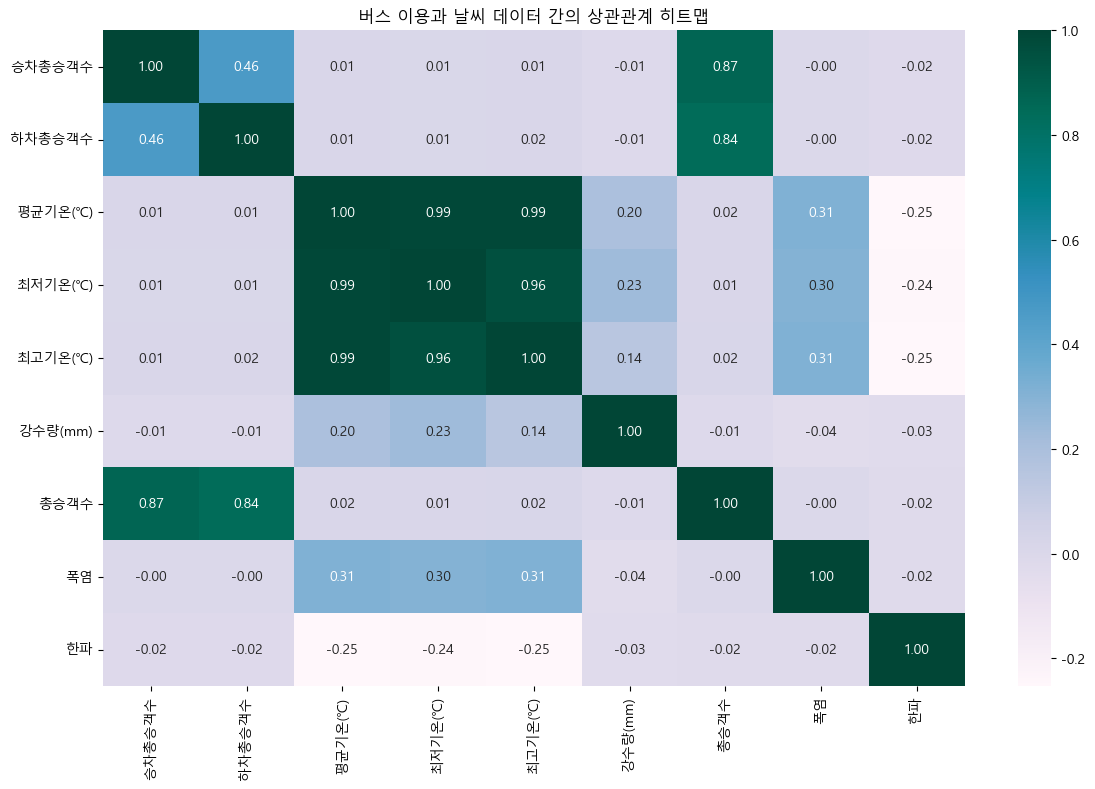

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(bus[['승차총승객수', '하차총승객수', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)',
                 '총승객수', '폭염', '한파']].corr(), annot=True, cmap='PuBuGn', fmt=".2f")
plt.title('버스 이용과 날씨 데이터 간의 상관관계 히트맵')

# 레이아웃 조정
plt.tight_layout()

plt.savefig('./bus_corr_heatmap.png')
plt.show()

In [11]:
# 결론 : 날씨와 버스 이용 간에는 상관관계가 없으며, 날씨가 안 좋다고 해서 사람들이 버스를 더 많이 이용하지는 않는다고 판단

##### 지하철 상관관계 분석

In [12]:
sub = pd.read_csv("./sub_pre_tem_merge.csv")
sub.head()

,날짜,역명,승차총승객수,하차총승객수,역명2,호선,역전화번호,도로명주소,지번주소,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,을지로4가역,3862,3728,2호선 을지로4가역,2호선,02-6110-2041,서울특별시 중구 을지로 지하178(을지로4가),서울특별시 중구 을지로4가 267-1 을지로4가역(2호선),중구,-5.0,-8.2,-0.6,NaN
1,2019-01-01,을지로3가역,8104,7554,2호선 을지로3가역,2호선,02-6110-2031,서울특별시 중구 을지로 지하106(을지로3가),서울특별시 중구 을지로3가 347-3 을지로3가역(2호선),중구,-5.0,-8.2,-0.6,NaN
2,2019-01-01,을지로입구역,22478,21330,2호선 을지로입구역,2호선,02-6110-2021,서울특별시 중구 을지로 지하42(을지로1가),서울특별시 중구 을지로1가 100-1 을지로입구역(2호선),중구,-5.0,-8.2,-0.6,NaN
3,2019-01-01,시청역,8381,6049,2호선 시청역,2호선,02-6110-2011,서울특별시 중구 서소문로 지하127(서소문동),서울특별시 중구 서소문동 90-1 시청역(2호선),중구,-5.0,-8.2,-0.6,NaN
4,2019-01-01,동묘앞역,8045,8504,1호선 동묘앞역,1호선,02-6110-1271,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),종로구,-5.0,-8.2,-0.6,NaN


In [13]:
sub['총승객수'] = sub['승차총승객수'] + sub['하차총승객수']
sub.head()

,날짜,역명,승차총승객수,하차총승객수,역명2,호선,역전화번호,도로명주소,지번주소,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),총승객수
0,2019-01-01,을지로4가역,3862,3728,2호선 을지로4가역,2호선,02-6110-2041,서울특별시 중구 을지로 지하178(을지로4가),서울특별시 중구 을지로4가 267-1 을지로4가역(2호선),중구,-5.0,-8.2,-0.6,NaN,7590
1,2019-01-01,을지로3가역,8104,7554,2호선 을지로3가역,2호선,02-6110-2031,서울특별시 중구 을지로 지하106(을지로3가),서울특별시 중구 을지로3가 347-3 을지로3가역(2호선),중구,-5.0,-8.2,-0.6,NaN,15658
2,2019-01-01,을지로입구역,22478,21330,2호선 을지로입구역,2호선,02-6110-2021,서울특별시 중구 을지로 지하42(을지로1가),서울특별시 중구 을지로1가 100-1 을지로입구역(2호선),중구,-5.0,-8.2,-0.6,NaN,43808
3,2019-01-01,시청역,8381,6049,2호선 시청역,2호선,02-6110-2011,서울특별시 중구 서소문로 지하127(서소문동),서울특별시 중구 서소문동 90-1 시청역(2호선),중구,-5.0,-8.2,-0.6,NaN,14430
4,2019-01-01,동묘앞역,8045,8504,1호선 동묘앞역,1호선,02-6110-1271,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),종로구,-5.0,-8.2,-0.6,NaN,16549


In [14]:
# 평균기온이 33.0 이상인 경우 '폭염', -12.0 이하인 경우 '한파' 컬럼 생성
sub['폭염'] = np.where(sub['최고기온(℃)'] >= 33.0, 1, 0)
sub['한파'] = np.where(sub['최저기온(℃)'] <= -12.0, 1, 0)

sub.head()

,날짜,역명,승차총승객수,하차총승객수,역명2,호선,역전화번호,도로명주소,지번주소,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),총승객수,폭염,한파
0,2019-01-01,을지로4가역,3862,3728,2호선 을지로4가역,2호선,02-6110-2041,서울특별시 중구 을지로 지하178(을지로4가),서울특별시 중구 을지로4가 267-1 을지로4가역(2호선),중구,-5.0,-8.2,-0.6,NaN,7590,0,0
1,2019-01-01,을지로3가역,8104,7554,2호선 을지로3가역,2호선,02-6110-2031,서울특별시 중구 을지로 지하106(을지로3가),서울특별시 중구 을지로3가 347-3 을지로3가역(2호선),중구,-5.0,-8.2,-0.6,NaN,15658,0,0
2,2019-01-01,을지로입구역,22478,21330,2호선 을지로입구역,2호선,02-6110-2021,서울특별시 중구 을지로 지하42(을지로1가),서울특별시 중구 을지로1가 100-1 을지로입구역(2호선),중구,-5.0,-8.2,-0.6,NaN,43808,0,0
3,2019-01-01,시청역,8381,6049,2호선 시청역,2호선,02-6110-2011,서울특별시 중구 서소문로 지하127(서소문동),서울특별시 중구 서소문동 90-1 시청역(2호선),중구,-5.0,-8.2,-0.6,NaN,14430,0,0
4,2019-01-01,동묘앞역,8045,8504,1호선 동묘앞역,1호선,02-6110-1271,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),종로구,-5.0,-8.2,-0.6,NaN,16549,0,0


In [15]:
# '강수량(mm)' 컬럼의 NaN 값을 0으로 변경
sub['강수량(mm)'] = sub['강수량(mm)'].fillna(0).astype(int)

sub.head()

,날짜,역명,승차총승객수,하차총승객수,역명2,호선,역전화번호,도로명주소,지번주소,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),총승객수,폭염,한파
0,2019-01-01,을지로4가역,3862,3728,2호선 을지로4가역,2호선,02-6110-2041,서울특별시 중구 을지로 지하178(을지로4가),서울특별시 중구 을지로4가 267-1 을지로4가역(2호선),중구,-5.0,-8.2,-0.6,0,7590,0,0
1,2019-01-01,을지로3가역,8104,7554,2호선 을지로3가역,2호선,02-6110-2031,서울특별시 중구 을지로 지하106(을지로3가),서울특별시 중구 을지로3가 347-3 을지로3가역(2호선),중구,-5.0,-8.2,-0.6,0,15658,0,0
2,2019-01-01,을지로입구역,22478,21330,2호선 을지로입구역,2호선,02-6110-2021,서울특별시 중구 을지로 지하42(을지로1가),서울특별시 중구 을지로1가 100-1 을지로입구역(2호선),중구,-5.0,-8.2,-0.6,0,43808,0,0
3,2019-01-01,시청역,8381,6049,2호선 시청역,2호선,02-6110-2011,서울특별시 중구 서소문로 지하127(서소문동),서울특별시 중구 서소문동 90-1 시청역(2호선),중구,-5.0,-8.2,-0.6,0,14430,0,0
4,2019-01-01,동묘앞역,8045,8504,1호선 동묘앞역,1호선,02-6110-1271,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),종로구,-5.0,-8.2,-0.6,0,16549,0,0


In [16]:
# '폭염' 컬럼의 고유한 값 확인
unique_values = sub['폭염'].unique()
print(unique_values)

[0 1]


In [17]:
# 지하철 총 승객수와 폭염 사이의 상관관계 계산
sub_heat_corr = sub['총승객수'].corr(sub['폭염'])
print(sub_heat_corr)

-0.007888489225433327


In [18]:
# 지하철 총 승객수와 한파 사이의 상관관계 계산
sub_cold_corr = sub['총승객수'].corr(sub['한파'])
print(sub_cold_corr)

-0.02337386866388952


In [19]:
# 지하철 총 승객수와 강수량 사이의 상관관계 계산
sub_pre_corr = sub['총승객수'].corr(sub['강수량(mm)'])
print(sub_pre_corr)

-0.02058533128497386


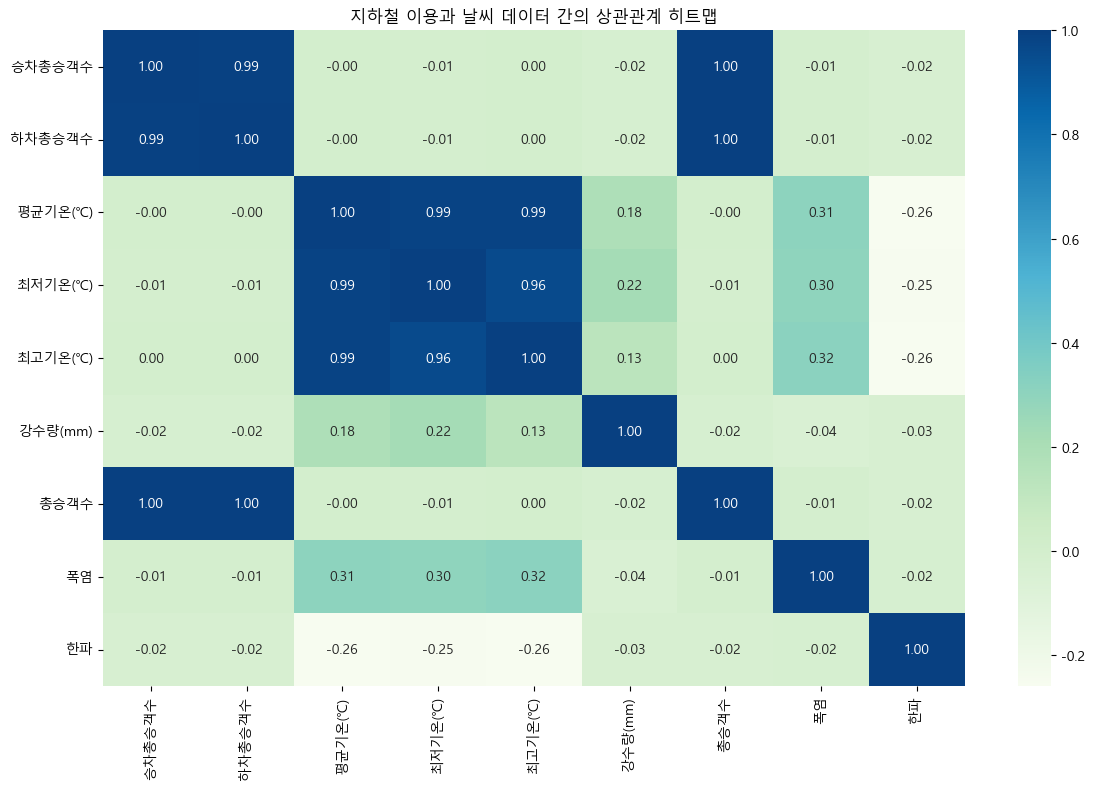

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(sub[['승차총승객수', '하차총승객수', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)',
                 '총승객수', '폭염', '한파']].corr(), annot=True, cmap='GnBu', fmt=".2f")
plt.title('지하철 이용과 날씨 데이터 간의 상관관계 히트맵')

# 레이아웃 조정
plt.tight_layout()

plt.savefig('./sub_corr_heatmap.png')
plt.show()

In [21]:
# 결론 : 날씨와 지하철 이용 간에는 상관관계가 없으며, 날씨가 안 좋다고 해서 사람들이 지하철을 더 많이 이용하지는 않는다고 판단

버스 선형 회귀 모델

In [47]:
# 선형 회귀 모델을 사용하여 '강수량'과 버스 총 승객수 간의 관계를 모델링하고 평가

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = bus['강수량(mm)'].values.reshape(-1, 1) # 독립 변수
y = bus['총승객수'].values.reshape(-1, 1) # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
print(f'결정 계수(R-squared): {r_squared}')

# 결론 : 독립 변수(강수량)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음을 확인

결정 계수(R-squared): 0.0001484786259187132


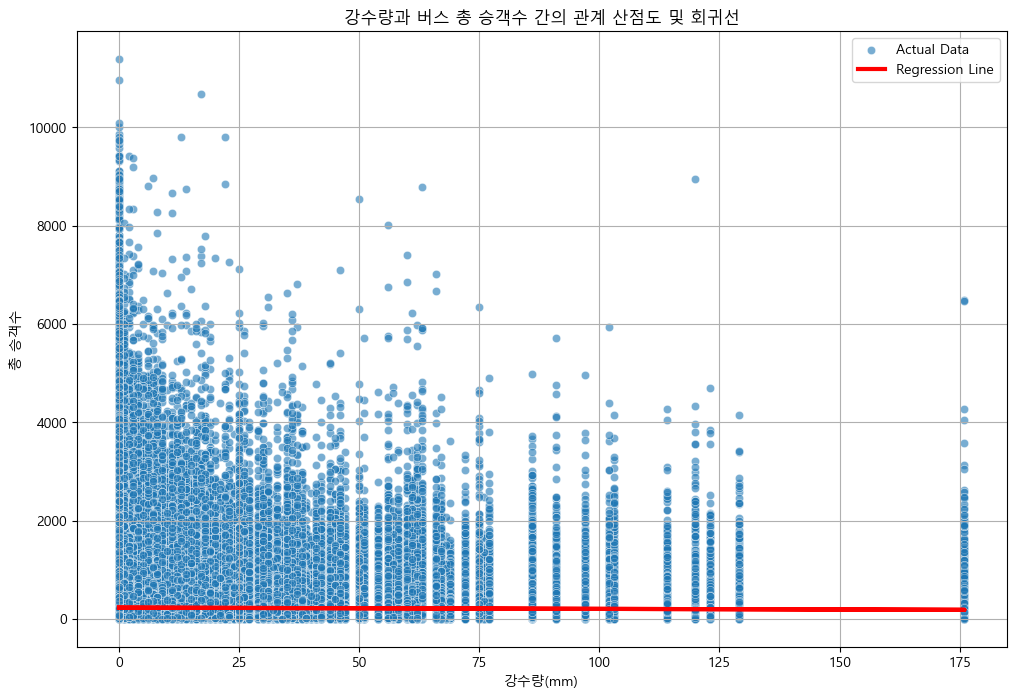

In [49]:
# 산점도, 회귀선 그리기

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), alpha=0.6, edgecolor='w', label='Actual Data')
plt.plot(X_test.flatten(), y_pred.flatten(), color='red', linewidth=3, label='Regression Line')

plt.title('강수량과 버스 총 승객수 간의 관계 산점도 및 회귀선')
plt.xlabel('강수량(mm)')
plt.ylabel('총 승객수')
plt.legend()
plt.grid(True)

plt.savefig('./bus_pre_corr_scatter.png')
plt.show()

# 일자로 평평한 회귀선은 종속 변수의 변화가 독립 변수의 변화와 관련이 없음을 나타냄
# 결론 : 독립 변수(강수량)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음을 확인

In [50]:
# 선형 회귀 모델을 사용하여 '폭염'과 버스 총 승객수 간의 관계를 모델링하고 평가

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = bus['폭염'].values.reshape(-1, 1)
y = bus['총승객수'].values.reshape(-1, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
print(f'결정 계수(R-squared): {r_squared}')

# 결론 : 독립 변수(폭염)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음

결정 계수(R-squared): 3.9585364852712246e-07


In [51]:
# 선형 회귀 모델을 사용하여 '한파'와 버스 총 승객수 간의 관계를 모델링하고 평가

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = bus['한파'].values.reshape(-1, 1)
y = bus['총승객수'].values.reshape(-1, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
print(f'결정 계수(R-squared): {r_squared}')

# 결론 : 독립 변수(한파)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음

결정 계수(R-squared): 0.000352622102148481


지하철 선형 회귀 모델

In [52]:
# 선형 회귀 모델을 사용하여 '강수량'과 지하철 총 승객수 간의 관계를 모델링하고 평가

X = sub['강수량(mm)'].values.reshape(-1, 1) # 독립 변수
y = sub['총승객수'].values.reshape(-1, 1) # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
print(f'결정 계수(R-squared): {r_squared}')

# 결론 : 독립 변수(강수량)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음을 확인

결정 계수(R-squared): 0.00047568410439280395


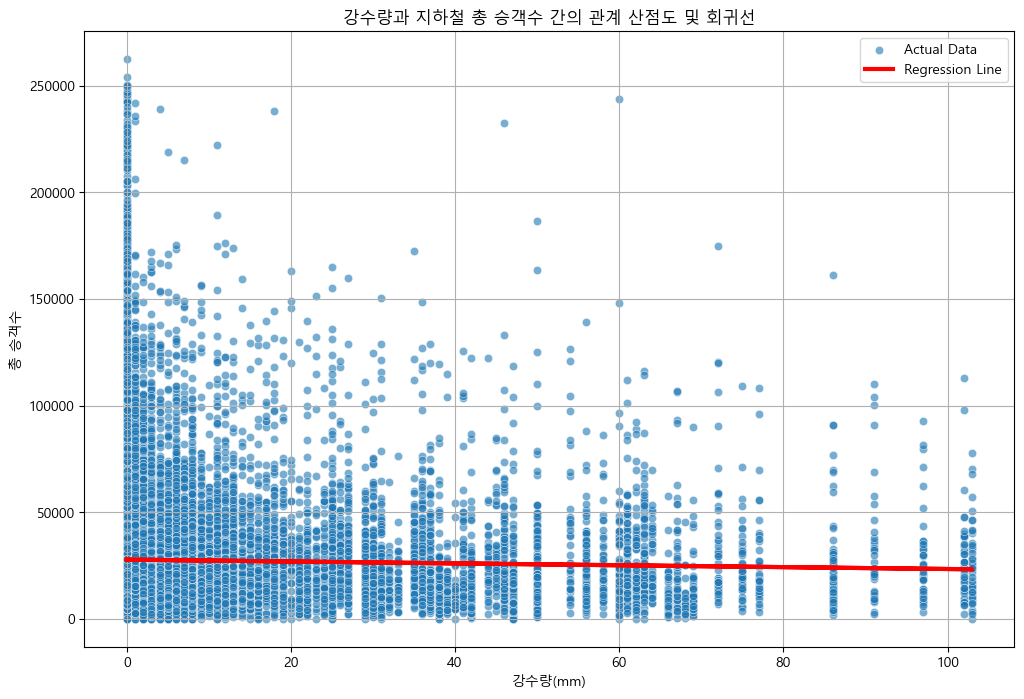

In [53]:
# 산점도, 회귀선 그리기

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), alpha=0.6, edgecolor='w', label='Actual Data')
plt.plot(X_test.flatten(), y_pred.flatten(), color='red', linewidth=3, label='Regression Line')

plt.title('강수량과 지하철 총 승객수 간의 관계 산점도 및 회귀선')
plt.xlabel('강수량(mm)')
plt.ylabel('총 승객수')
plt.legend()
plt.grid(True)

plt.savefig('./sub_pre_corr_scatter.png')
plt.show()

# 일자로 평평한 회귀선은 종속 변수의 변화가 독립 변수의 변화와 관련이 없음을 나타냄
# 결론 : 독립 변수(강수량)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음을 확인

In [42]:
# 선형 회귀 모델을 사용하여 '폭염'와 지하철 총 승객수 간의 관계를 모델링하고 평가

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = sub['폭염'].values.reshape(-1, 1)
y = sub['총승객수'].values.reshape(-1, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
print(f'결정 계수(R-squared): {r_squared}')

# 결론 : 독립 변수(폭염)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음

결정 계수(R-squared): -5.663849768144935e-05


In [41]:
# 선형 회귀 모델을 사용하여 '한파'와 지하철 총 승객수 간의 관계를 모델링하고 평가

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = sub['한파'].values.reshape(-1, 1)
y = sub['총승객수'].values.reshape(-1, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
print(f'결정 계수(R-squared): {r_squared}')

# 결론 : 독립 변수(한파)와 종속 변수(총승객수) 간의 선형 관계가 매우 약하거나 존재하지 않음

결정 계수(R-squared): 0.0005346775305221652
